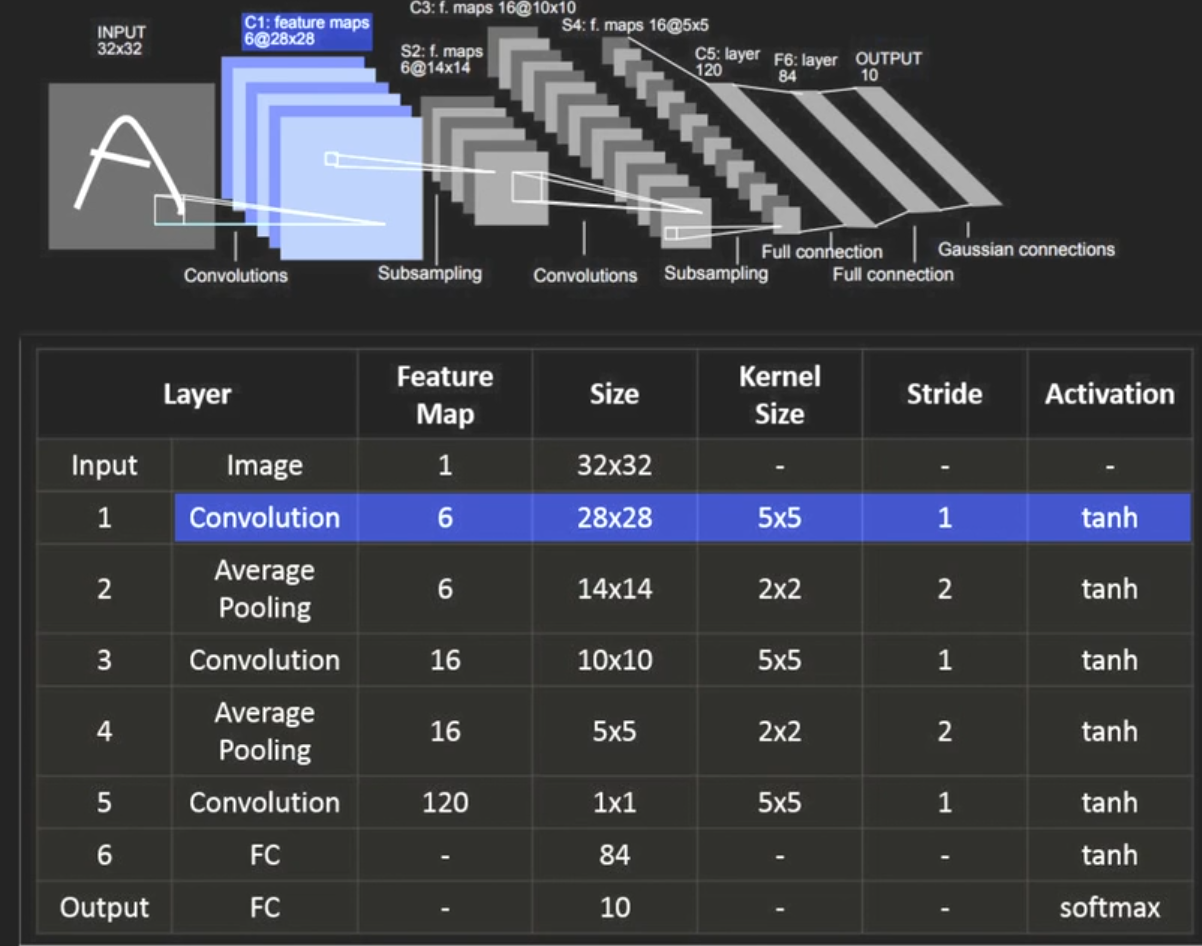

In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)

torch.manual_seed(0)
torch.cuda.manual_seed(0)
# cuda отсутствует =(((
# torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./Datasets/', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./Datasets/', download=True, train=False)

In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
len(y_train), len(y_test)

(60000, 10000)

TypeError: Invalid shape (1, 28, 28) for image data

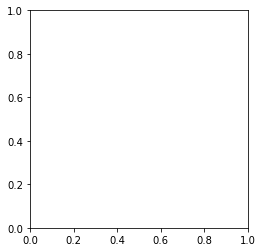

In [10]:
import matplotlib.pyplot as plt
num = random.randrange(len(y_test))
plt.imshow(X_train[num, :, :])
plt.show()
print(y_train[num])

In [6]:
X_train.shape

torch.Size([60000, 28, 28])

In [5]:
# Разжимаем до размера [60000, 1, 28, 28], тк на вход нужно получать матрицы 28х28 
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()
X_train.shape

torch.Size([60000, 1, 28, 28])

In [8]:
X_test.shape

torch.Size([10000, 1, 28, 28])

In [9]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6,
                                     kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5*5*16, 120)
        self.act3 = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        # растягиваем вектор х
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [10]:
class CustomLeNet5(torch.nn.Module):
    def __init__(self):
        super(CustomLeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6,
                                     kernel_size=5, padding=2)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5*5*16, 120)
        self.act3 = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        # растягиваем вектор х
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
custom_lenet5 = CustomLeNet5()

In [11]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-4)
#custom_optimizer = torch.optim.Adam(custom_lenet5.parameters(), lr=1.0e-3)

In [12]:
# batch_size = 100
# test_accuracy_history = []
# test_loss_history = []

# # custom_test_accuracy_history = []
# # custom_test_loss_history = []

# for epoch in range(10000):
#     order = np.random.permutation(len(X_train))
    
#     for start_index in range(0, len(X_train), batch_size):
#         optimizer.zero_grad()
# #         custom_optimizer.zero_grad()
        
#         batch_indexes = order[start_index:start_index+batch_size]
        
#         X_batch = X_train[batch_indexes]
#         y_batch = y_train[batch_indexes]
        
#         preds = lenet5.forward(X_batch)
# #         custom_preds = custom_lenet5.forward(X_batch)
        
#         loss_value = loss(preds, y_batch)
#         loss_value.backward()
# #         custom_loss_value = loss(custom_preds, y_batch)
# #         custom_loss_value.backward()
        
#         optimizer.step()
# #         custom_optimizer.step()
    
#     test_preds = lenet5.forward(X_test)
#     test_loss_history.append(loss(test_preds,y_test).data)
    
    
#     accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
#     test_accuracy_history.append(accuracy)
    
# #     c_test_preds = custom_lenet5.forward(X_test)
# #     custom_test_loss_history.append(loss(c_test_preds,y_test).data)
    
    
# #     c_accuracy = (c_test_preds.argmax(dim=1) == y_test).float().mean().data
# #     custom_test_accuracy_history.append(c_accuracy)
    
#     print(accuracy)

In [13]:
def butch_studing(optimizer, net, loss, N_epoch = 10000, batch_size =100, ):
    batch_size = 100
    test_accuracy_history = []
    test_loss_history = []

    for epoch in range(N_epoch):
        order = np.random.permutation(len(X_train))

        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds,y_test).data)


        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
        test_accuracy_history.append(accuracy)

        print(accuracy)
    return test_accuracy_history, test_loss_history

In [14]:
class CustomV2LeNet5(torch.nn.Module):
    def __init__(self):
        super(CustomV2LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6,
                                     kernel_size=3, padding=1)
        self.act1 = torch.nn.ELU()
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=6,
                                     kernel_size=3, padding=1)
        self.act2 = torch.nn.ELU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv3 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=3, padding=0)
        self.act3 = torch.nn.ELU()
        self.conv4 = torch.nn.Conv2d(
            in_channels=16, out_channels=16, kernel_size=3, padding=0)
        self.act4 = torch.nn.ELU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5*5*16, 120)
        self.act5 = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act6  = torch.nn.ELU()
        
        self.fc3   = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.conv4(x)
        x = self.act4(x)
        x = self.pool2(x)
        # растягиваем вектор х
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act5(x)
        x = self.fc2(x)
        x = self.act6(x)
        x = self.fc3(x)
        
        return x
    
custom_v2_lenet5 = CustomV2LeNet5()

In [15]:
optimizer = torch.optim.Adam(custom_v2_lenet5.parameters(), lr=1.0e-3)


In [16]:
test_accuracy_history, test_loss_history = butch_studing(optimizer=optimizer, 
              loss=torch.nn.CrossEntropyLoss(), net=custom_v2_lenet5, N_epoch = 50)

tensor(0.9811)
tensor(0.9872)
tensor(0.9873)
tensor(0.9894)
tensor(0.9873)
tensor(0.9878)
tensor(0.9892)
tensor(0.9901)
tensor(0.9896)
tensor(0.9891)
tensor(0.9882)
tensor(0.9903)
tensor(0.9860)
tensor(0.9903)
tensor(0.9905)
tensor(0.9904)
tensor(0.9909)
tensor(0.9902)
tensor(0.9901)
tensor(0.9905)
tensor(0.9890)
tensor(0.9898)
tensor(0.9853)
tensor(0.9916)
tensor(0.9907)
tensor(0.9882)
tensor(0.9903)
tensor(0.9870)
tensor(0.9873)
tensor(0.9875)
tensor(0.9904)
tensor(0.9907)
tensor(0.9864)
tensor(0.9897)
tensor(0.9921)
tensor(0.9912)
tensor(0.9901)
tensor(0.9915)
tensor(0.9919)
tensor(0.9896)
tensor(0.9901)
tensor(0.9891)
tensor(0.9900)
tensor(0.9910)
tensor(0.9886)
tensor(0.9914)
tensor(0.9907)
tensor(0.9905)
tensor(0.9909)
tensor(0.9905)


In [6]:
class FinallCustomLenet(torch.nn.Module):
    def __init__(self):
        super(FinallCustomLenet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6,
                                     kernel_size=3, padding=1)
        self.act1 = torch.nn.ELU()
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=6,
                                     kernel_size=3, padding=1)
        self.act2 = torch.nn.ELU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv3 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=3, padding=0)
        self.act3 = torch.nn.ELU()
        self.bn3 = torch.nn.BatchNorm2d(num_features=16)
        self.conv4 = torch.nn.Conv2d(
            in_channels=16, out_channels=16, kernel_size=3, padding=0)
        self.act4 = torch.nn.ELU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5*5*16, 120)
        self.act5 = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act6  = torch.nn.ELU()
        
        self.fc3   = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.bn3(x)
        x = self.conv4(x)
        x = self.act4(x)
        x = self.pool2(x)
        # растягиваем вектор х
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act5(x)
        x = self.fc2(x)
        x = self.act6(x)
        x = self.fc3(x)
        
        return x
    
final = FinallCustomLenet()

In [7]:
optimizer = torch.optim.Adam(final.parameters(), lr=1.0e-3)
loss = torch.nn.CrossEntropyLoss()

In [8]:
batch_size = 100
test_accuracy_history = []
test_loss_history = []

for epoch in range(10000):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        final.train()
        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = final.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
        
    final.eval()
    test_preds = final.forward(X_test)
    test_loss_history.append(loss(test_preds,y_test).data)


    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9804)
tensor(0.9879)
tensor(0.9888)
tensor(0.9879)
tensor(0.9873)
tensor(0.9886)
tensor(0.9900)
tensor(0.9903)
tensor(0.9901)
tensor(0.9902)
tensor(0.9899)
tensor(0.9920)
tensor(0.9904)
tensor(0.9893)
tensor(0.9886)
tensor(0.9903)
tensor(0.9893)
tensor(0.9913)
tensor(0.9910)
tensor(0.9926)
tensor(0.9908)
tensor(0.9909)
tensor(0.9900)
tensor(0.9907)
tensor(0.9933)
tensor(0.9920)
tensor(0.9902)
tensor(0.9916)
tensor(0.9917)
tensor(0.9903)
tensor(0.9899)
tensor(0.9909)
tensor(0.9906)
tensor(0.9920)
tensor(0.9924)
tensor(0.9922)
tensor(0.9914)
tensor(0.9928)
tensor(0.9902)
tensor(0.9896)
tensor(0.9909)
tensor(0.9921)
tensor(0.9923)
tensor(0.9925)
tensor(0.9874)
tensor(0.9894)
tensor(0.9920)
tensor(0.9902)
tensor(0.9918)
tensor(0.9914)
tensor(0.9918)
tensor(0.9909)
tensor(0.9915)
tensor(0.9918)
tensor(0.9919)
tensor(0.9884)
tensor(0.9911)
tensor(0.9918)
tensor(0.9921)
tensor(0.9893)
tensor(0.9913)
tensor(0.9907)
tensor(0.9925)
tensor(0.9924)
tensor(0.9914)
tensor(0.9912)
tensor(0.9

KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

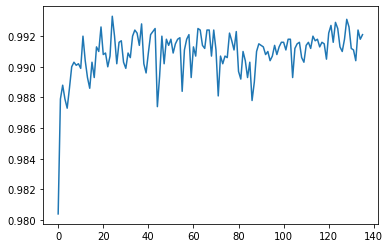

In [11]:
import matplotlib.pyplot as plt
plt.plot(test_accuracy_history)
plt.show

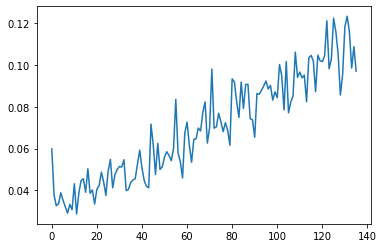

In [12]:
plt.plot(test_loss_history)
plt.show()

In [19]:
max(test_accuracy_history)

tensor(0.9921)